In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import fnmatch
import os
import pandas as pd
import datetime


In [2]:
def get_df(sdir, NAME, raw_x, TICKER ):
    '''
    This function iterates through RegSHO data over a data range and pulls rows for a TICKER and
    puts the data into a pandas data frame
    a row is as follows. The consolodated daily short data is in the CNMSyyyymmdd.txt file for every trade day
    
    Date|Symbol|ShortVolume|ShortExemptVolume|TotalVolume|Market
    
    '''
    xxx = []
    for shortdate in raw_x:
        #print(shortdate)
        for file in os.listdir(sdir):
            matchme = prefix+str(shortdate)+'*'
            if fnmatch.fnmatch(file, matchme):
                xxx.append(file)

    df = None            


    for filename in xxx:
        f = open(sdir+filename)
        try:
            fullfile = pd.read_csv(f,sep="|")
            if df is None:
                tickerrow = fullfile.loc[fullfile['Symbol'] == TICKER]
                df = tickerrow

            else:
                tickerrow = fullfile.loc[fullfile['Symbol'] == TICKER]
                df = df.append(tickerrow)
        except:
            print('failed: {}'.format(filename))
    return df

## Setup Test Time Frame

### This is RegSHO Data

In [ ]:
# Generate dates to pull logs with
# We need to convert the Date time to YYYYMMDD as that is the format
# dates here are max values that are available. The earliest data I have is 20190102
start_date = '20210102'
end_date = '20210801'
x = pd.date_range(start=start_date,end=end_date,freq='D').strftime('%Y%m%d')

# this is the location of where I downloaded the data. REPLACE this with where you have your data 
sdir =  '/mnt/5c823cd2-502b-4990-a220-579838be1f10/data/shortdata2/'

# Base Filename Generation
prefix = 'CNMSshvol'
# Our test Ticker.. 
TICKER = 'GME'

In [3]:
df = get_df(sdir, prefix, x, TICKER)
df.tail()

##

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
3804,20210716,GME,825962.0,2279.0,1318731.0,"B,Q,N"
3879,20210719,GME,591517.0,2944.0,965646.0,"B,Q,N"
3853,20210720,GME,745972.0,5398.0,1171066.0,"B,Q,N"
3810,20210721,GME,581102.0,2156.0,986452.0,"B,Q,N"
3785,20210722,GME,342717.0,355.0,609579.0,"B,Q,N"


In [4]:
# Change the date format from YYYYMMDD to matplotlib compliant 
import datetime as dt
date_fmt ='%Y%m%d'

raw_x = df['Date']
df_dt = [dt.datetime.strptime(str(i), date_fmt) for i in raw_x]

# df_dt will be used throughout the file as the time series


## Import market watch data

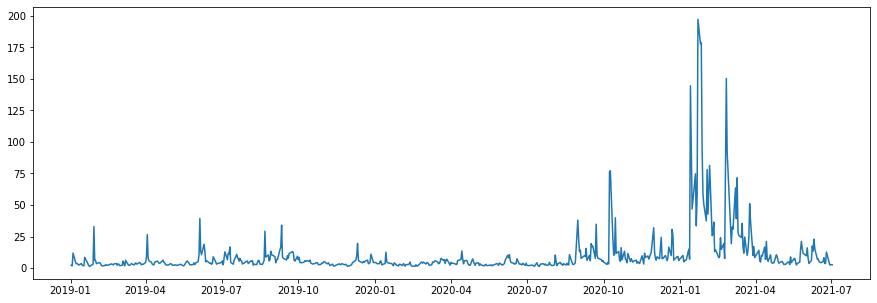

In [5]:
#del df_mw
from collections import OrderedDict

filenames = []
year = 2019
sdir =  '/mnt/5c823cd2-502b-4990-a220-579838be1f10/data/marketwatchticker/'
basename = 'Download Data - STOCK_US_XNYS_GME'+str(year)+'.csv'
f1 = sdir+basename

year = 2020
sdir =  '/mnt/5c823cd2-502b-4990-a220-579838be1f10/data/marketwatchticker/'
basename = 'Download Data - STOCK_US_XNYS_GME'+str(year)+'.csv'
f2 = sdir+basename

year = 2021
sdir =  '/mnt/5c823cd2-502b-4990-a220-579838be1f10/data/marketwatchticker/'
basename = 'Download Data - STOCK_US_XNYS_GME'+str(year)+'.csv'
f3 = sdir+basename

df_mw1 = pd.read_csv(f1)
df_mw1 = df_mw1.sort_values(by='Date')
df_mw2 = pd.read_csv(f2)
df_mw2 = df_mw2.sort_values(by='Date')
df_mw3 = pd.read_csv(f3)
df_mw3 = df_mw3.sort_values(by='Date')

# Merge the MW entries into one entry
df_mw = df_mw1
df_mw = df_mw.append(df_mw2)
df_mw = df_mw.append(df_mw3)

# fix commas in volume
df_mw['Volume'] = df_mw['Volume'].str.replace(',', '').astype(int)


# Create the time series
date_fmt ='%m/%d/%Y'
dt_mw = df_mw['Date']
df_mw_dt = [dt.datetime.strptime(str(i), date_fmt) for i in dt_mw]


plt.figure(figsize=(15,5))
plt.plot(df_mw_dt,df_mw['Volume']/1e6, label='Market Watch Total Volume')


In [6]:
date_fmt ='%Y%m%d'
s_date_obj=dt.datetime.strptime(str(start_date), date_fmt)
s_date = s_date_obj.strftime('%m/%d/%Y')

e_date_obj=dt.datetime.strptime(str(end_date), date_fmt)
e_date = e_date_obj.strftime('%m/%d/%Y')

print(s_date,e_date)

01/02/2021 08/01/2021


In [7]:
df_mw
derp = df_mw

In [15]:
df_mw

,Date,Open,High,Low,Close,Volume
251,01/02/2019,12.45,13.18,12.42,13.07,2124200
250,01/03/2019,12.98,13.26,12.69,12.97,1750353
249,01/04/2019,14.03,15.29,13.70,15.24,11915690
248,01/07/2019,15.11,15.81,14.94,15.48,4718028
247,01/08/2019,15.50,15.89,15.15,15.81,3444019
...,...,...,...,...,...,...
4,06/28/2021,211.25,224.45,210.20,213.25,4879364
3,06/29/2021,213.59,215.22,208.01,210.88,2480009
2,06/30/2021,209.69,215.28,206.94,214.14,2539648
1,07/01/2021,213.40,216.83,202.00,204.36,2742112


In [21]:
mask = ((derp['Date']>s_date) )
print(type(derp['Date'][0]))

<class 'str'>


In [13]:
derp = derp.loc[mask]

In [14]:
derp

,Date,Open,High,Low,Close,Volume
250,01/03/2019,12.98,13.26,12.69,12.97,1750353
249,01/04/2019,14.03,15.29,13.70,15.24,11915690
248,01/07/2019,15.11,15.81,14.94,15.48,4718028
247,01/08/2019,15.50,15.89,15.15,15.81,3444019
246,01/09/2019,15.84,16.39,15.72,15.98,3554522
...,...,...,...,...,...,...
4,06/28/2021,211.25,224.45,210.20,213.25,4879364
3,06/29/2021,213.59,215.22,208.01,210.88,2480009
2,06/30/2021,209.69,215.28,206.94,214.14,2539648
1,07/01/2021,213.40,216.83,202.00,204.36,2742112
